# Introduction to Text Classification

1. **Data (Text) Preprocessing**:
    - Lower Case
    - Remove links
    - Remove next lines (\n)
    - Words containing numbers
    - Extra spaces
    - Special characters
    - Removal of stop words
    - Stemming
    - Lemmatization
2. **Featuring Engineering**:
    - Convert the Text corpus to a matrix of word counts. (Vectorize the Text data)
        Eg: Use Tf-IDF
3. **Model Building**:
    - Divide the dataset in to Train (70%), Test (20%) and Validation (10%) datasets.
    - Build at least 3 classification models
    
       **Step 1**: Build model 1 and generate the classification report (Performance metrics using Confusion
       Metrics) for both Training and Test datasets.
       
       **Step 2**:
            • Use grid search or binary search for Hyperparameter Tuning.
            • Use atleast 2 values for each hyperparameters.
            • Choose the best model parameters based on grid search and generate the classification report
              (Performance metrics using Confusion Metrics) for both Training and Test datasets.
            
       **Step 3**: Repeat step 1 and 2 for Model 2 and Model 3 as well.
       
       **Step 4**: Now choose the final model based on the classification report (Performance metrics using
                   Confusion Metrics) for both Training, Test and validation datasets.

# Required Modules

In [1]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

# Defining Function for Data Preprocessing

In [2]:
# Define the preprocess_text function
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'http\S+', '', text)
    text = text.replace('\n', ' ')
    text = re.sub(r'\w*\d\w*', '', text)
    text = re.sub(' +', ' ', text)
    text = re.sub(r'[^\w\s]', '', text)
    stop_words = set(stopwords.words('english'))
    text = ' '.join(word for word in text.split() if word not in stop_words)
    stemmer = PorterStemmer()
    text = ' '.join(stemmer.stem(word) for word in text.split())
    lemmatizer = WordNetLemmatizer()
    text = ' '.join(lemmatizer.lemmatize(word) for word in text.split())
    return text

# Loading dataset , performing data preprocessing

In [3]:
# Load and preprocess the text data
corpus = pd.read_csv(r"F:\anu\infosys_internship\Emotions_training.csv")['text'].apply(preprocess_text)

# vectorizing process

In [4]:
# Convert the Text corpus to a matrix of word counts
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(corpus)
y = pd.read_csv(r"F:\anu\infosys_internship\Emotions_training.csv")['label']

# Dividing dataset 

    Dividing data into 3 parts
    1.Training Data                                                                                                                 2.Testing Data                                                                                                                   3.Validation Data                                                                                                               In which the training data contains 70% of data ,testing data contains 20% and 10% of data is validation data 

In [5]:
# Divide the dataset into Train, Test, and Validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.33, random_state=42)

# Buliding Classification models

   # Model1
    Here i am considering Multinomial Naive Bayes (MultinomialNB) model as model1

In [6]:
# Define a function to build and evaluate the model
def build_and_evaluate_model(model, param_grid, X_train, y_train, X_test, y_test):
    grid_search = GridSearchCV(model, param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    
    y_pred_train = best_model.predict(X_train)
    y_pred_test = best_model.predict(X_test)
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    
    y_pred_val = best_model.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_pred_val)
    
    print("Training Set")
    print(classification_report(y_train, y_pred_train))
    print("Testing Set")
    print(classification_report(y_test, y_pred_test))
    print("Validation Set")
    print(classification_report(y_val, y_pred_val))
    print("Accuracy for Model - Training Set:", train_accuracy)
    print("Accuracy for Model - Test Set:", test_accuracy)
    print("Accuracy for Model - Validation Set:", val_accuracy)
    
    return best_model

# Model 1: Naive Bayes
nb_param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0]}
nb_model = MultinomialNB()
best_nb_model = build_and_evaluate_model(nb_model, nb_param_grid, X_train, y_train, X_test, y_test)
print(best_nb_model)


Training Set
              precision    recall  f1-score   support

           0       0.89      0.98      0.94      3232
           1       0.88      0.98      0.93      3781
           2       0.99      0.64      0.78       870
           3       0.98      0.88      0.93      1552
           4       0.96      0.87      0.91      1371
           5       1.00      0.52      0.68       394

    accuracy                           0.91     11200
   macro avg       0.95      0.81      0.86     11200
weighted avg       0.92      0.91      0.91     11200

Testing Set
              precision    recall  f1-score   support

           0       0.75      0.87      0.81       946
           1       0.68      0.91      0.78      1073
           2       0.76      0.26      0.38       296
           3       0.79      0.60      0.68       399
           4       0.84      0.59      0.70       380
           5       0.77      0.08      0.15       122

    accuracy                           0.73      321

# Function for Confusion Matrix

In [7]:
def see_confusion_matrix(model, title, y_true, X_true):
    y_pred = model.predict(X_true)
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Pastel1', fmt='g')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    confusion Matrix for training data

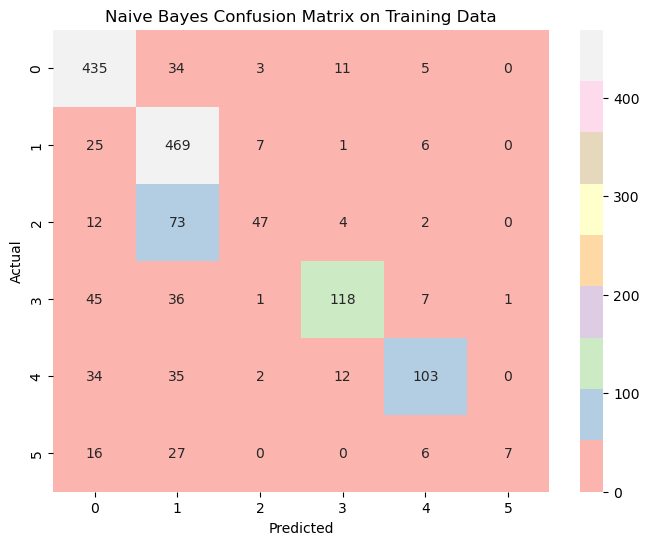

In [8]:
see_confusion_matrix(best_nb_model, "Naive Bayes Confusion Matrix on Training Data", y_val, X_val)

    confusion Matrix for testing data

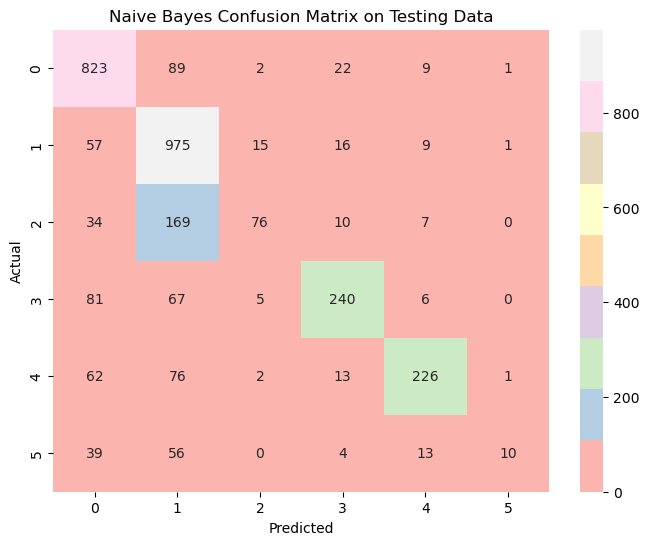

In [9]:
see_confusion_matrix(best_nb_model, "Naive Bayes Confusion Matrix on Testing Data", y_test, X_test)

    confusion Matrix for validation data

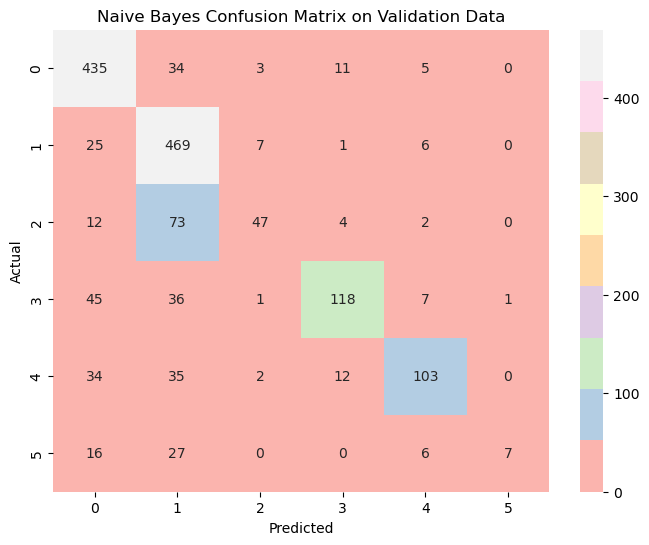

In [10]:
see_confusion_matrix(best_nb_model, "Naive Bayes Confusion Matrix on Validation Data", y_val, X_val)

    Training Accuracy: High training accuracy (91.19%) indicates that the model performs well on the training set.
    Test Accuracy: test accuracy (73.07%) compared to the training accuracy.
    Validation Accuracy: Similar validation accuracy (74.43%) to test accuracy.
    By building Multinomial Naive Bayes (MultinomialNB)

   # Model2
    Here i am considering Random Forest model as model2

In [11]:
# Define a function to build and evaluate the model
def build_and_evaluate_model(model, X_train, y_train, X_test, y_test, X_val, y_val):
    model.fit(X_train, y_train)
    
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    
    y_pred_val = model.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_pred_val)
    
    print("Training Set")
    print(classification_report(y_train, y_pred_train))
    print("Testing Set")
    print(classification_report(y_test, y_pred_test))
    print("Validation Set")
    print(classification_report(y_val, y_pred_val))
    print("Accuracy for Model - Training Set:", train_accuracy)
    print("Accuracy for Model - Test Set:", test_accuracy)
    print("Accuracy for Model - Validation Set:", val_accuracy)
    
    return model

# Model 2: Random Forest
rf_model = RandomForestClassifier()
best_rf_model = build_and_evaluate_model(rf_model, X_train, y_train, X_test, y_test, X_val, y_val)
print(best_rf_model)

Training Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3232
           1       1.00      1.00      1.00      3781
           2       0.99      0.99      0.99       870
           3       1.00      1.00      1.00      1552
           4       1.00      1.00      1.00      1371
           5       0.99      0.99      0.99       394

    accuracy                           1.00     11200
   macro avg       1.00      1.00      1.00     11200
weighted avg       1.00      1.00      1.00     11200

Testing Set
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       946
           1       0.84      0.91      0.87      1073
           2       0.81      0.58      0.68       296
           3       0.79      0.85      0.82       399
           4       0.84      0.81      0.82       380
           5       0.77      0.72      0.74       122

    accuracy                           0.85      321

   # Confusion Matrix 
    confusion Matrix for training data

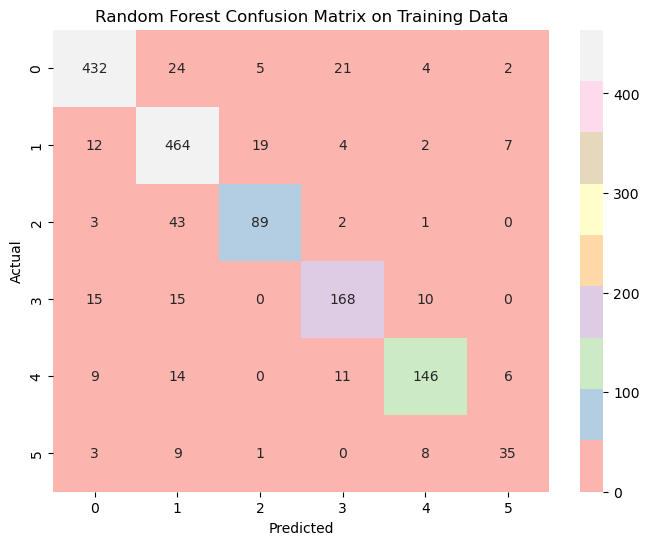

In [12]:
see_confusion_matrix(best_rf_model, "Random Forest Confusion Matrix on Training Data", y_val, X_val)

    confusion Matrix for testing data

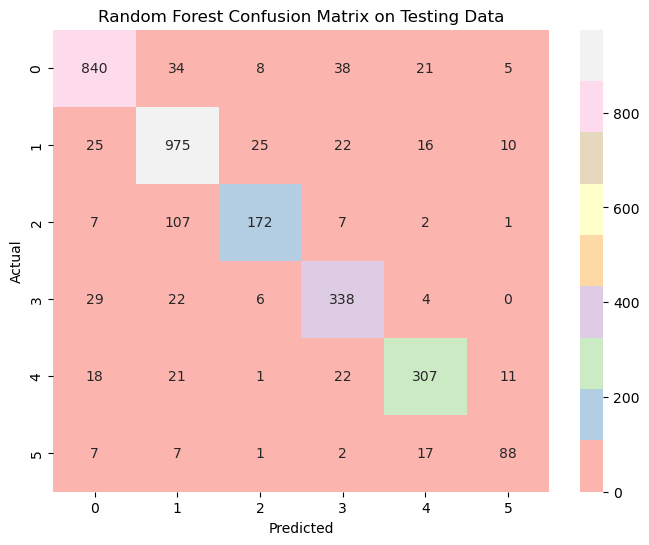

In [13]:
see_confusion_matrix(best_rf_model, "Random Forest Confusion Matrix on Testing Data", y_test, X_test)

    confusion Matrix for validation data

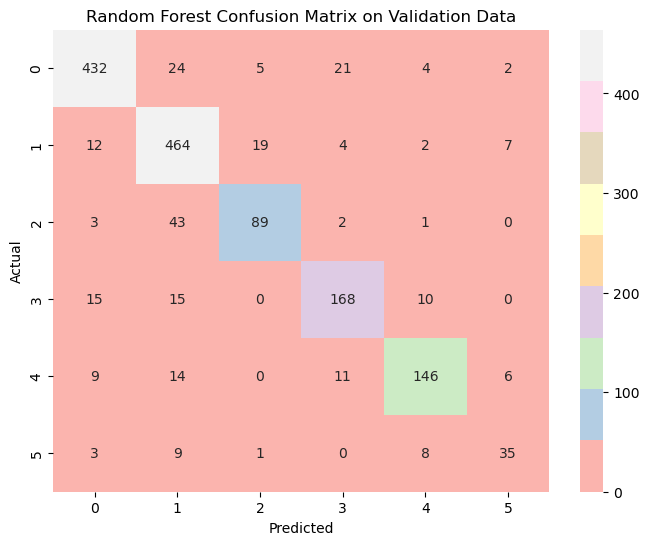

In [14]:
see_confusion_matrix(best_rf_model, "Random Forest Confusion Matrix on Validation Data", y_val, X_val)

    Training Accuracy: High training accuracy (99.79%) indicates that the model performs well on the training set.
    Test Accuracy: test accuracy (84.48%) compared to the training accuracy.
    Validation Accuracy: Similar validation accuracy (84.46%) to test accuracy.
    By building Random Forest Model

# Model3
    Here i am considering Logistic Regression model as model3

In [15]:
# Define a function to build and evaluate the model
def build_and_evaluate_model(model, param_grid, X_train, y_train, X_test, y_test):
    grid_search = GridSearchCV(model, param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    
    y_pred_train = best_model.predict(X_train)
    y_pred_test = best_model.predict(X_test)
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    
    y_pred_val = best_model.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_pred_val)
    
    print("Training Set")
    print(classification_report(y_train, y_pred_train))
    print("Testing Set")
    print(classification_report(y_test, y_pred_test))
    print("Validation Set")
    print(classification_report(y_val, y_pred_val))
    print("Accuracy for Model - Training Set:", train_accuracy)
    print("Accuracy for Model - Test Set:", test_accuracy)
    print("Accuracy for Model - Validation Set:", val_accuracy)
    
    return best_model

# Model 3: Logistic Regression
lr_param_grid = {'C': [0.1, 1.0, 10.0], 'penalty': ['l1', 'l2']}
lr_model = LogisticRegression(solver='liblinear')
best_lr_model = build_and_evaluate_model(lr_model, lr_param_grid, X_train, y_train, X_test, y_test)
print(best_lr_model)

Training Set
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      3232
           1       0.87      0.94      0.90      3781
           2       0.84      0.64      0.73       870
           3       0.90      0.87      0.89      1552
           4       0.88      0.85      0.86      1371
           5       0.82      0.68      0.75       394

    accuracy                           0.89     11200
   macro avg       0.87      0.82      0.84     11200
weighted avg       0.89      0.89      0.89     11200

Testing Set
              precision    recall  f1-score   support

           0       0.92      0.91      0.92       946
           1       0.83      0.93      0.88      1073
           2       0.86      0.57      0.69       296
           3       0.84      0.86      0.85       399
           4       0.87      0.83      0.85       380
           5       0.79      0.66      0.72       122

    accuracy                           0.86      321

# Confusion Matrix
    confusion Matrix for training data

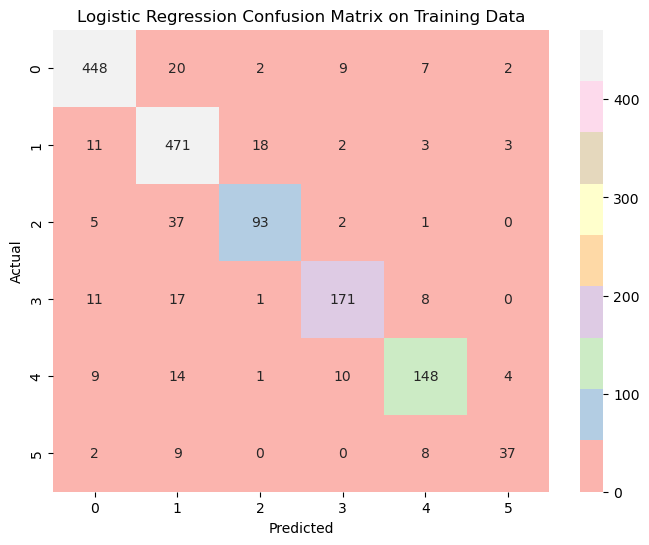

In [16]:
see_confusion_matrix(best_lr_model, "Logistic Regression Confusion Matrix on Training Data", y_val, X_val)

    confusion Matrix for testing data

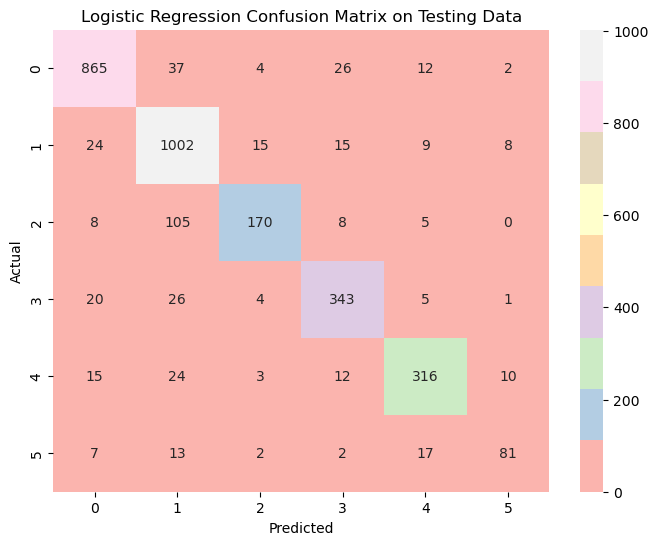

In [17]:
see_confusion_matrix(best_lr_model, "Logistic Regression Confusion Matrix on Testing Data", y_test, X_test)

    confusion Matrix for validation data

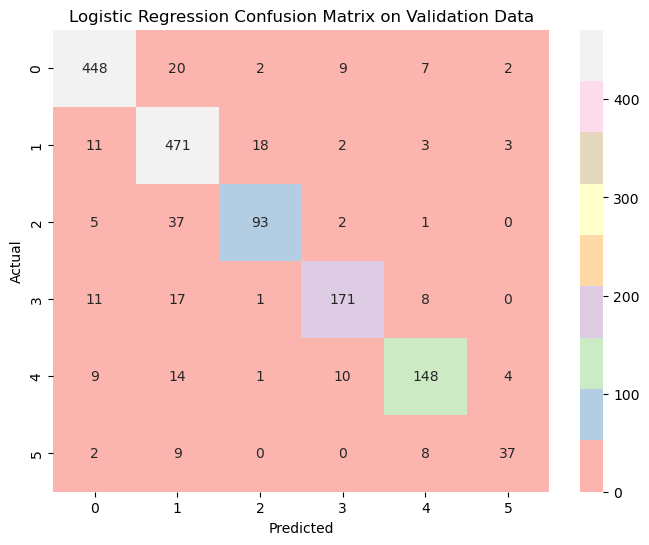

In [18]:
see_confusion_matrix(best_lr_model, "Logistic Regression Confusion Matrix on Validation Data", y_val, X_val)

    Training Accuracy: High training accuracy (88.75%) indicates that the model performs well on the training set.
    Test Accuracy: test accuracy (86.34%) compared to the training accuracy.
    Validation Accuracy: Similar validation accuracy (86.36%) to test accuracy.
    By building Logistic Regression Model

# Model4
    Here i am considering SVM model as model4

In [19]:

# Define a function to build and evaluate the model
def build_and_evaluate_model(model, param_grid, X_train, y_train, X_test, y_test):
    grid_search = GridSearchCV(model, param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    
    y_pred_train = best_model.predict(X_train)
    y_pred_test = best_model.predict(X_test)
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    
    y_pred_val = best_model.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_pred_val)
    
    print("Training Set")
    print(classification_report(y_train, y_pred_train))
    print("Testing Set")
    print(classification_report(y_test, y_pred_test))
    print("Validation Set")
    print(classification_report(y_val, y_pred_val))
    print("Accuracy for Model - Training Set:", train_accuracy)
    print("Accuracy for Model - Test Set:", test_accuracy)
    print("Accuracy for Model - Validation Set:", val_accuracy)
    
    return best_model

# Model 3: SVM
svm_param_grid = {'C': [1, 10], 'gamma': ['scale', 'auto']}
svm_model = SVC()
best_svm_model = build_and_evaluate_model(svm_model, svm_param_grid, X_train, y_train, X_test, y_test)
print(best_svm_model)

Training Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3232
           1       1.00      1.00      1.00      3781
           2       1.00      0.99      0.99       870
           3       1.00      1.00      1.00      1552
           4       1.00      1.00      1.00      1371
           5       1.00      0.98      0.99       394

    accuracy                           1.00     11200
   macro avg       1.00      1.00      1.00     11200
weighted avg       1.00      1.00      1.00     11200

Testing Set
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       946
           1       0.76      0.94      0.84      1073
           2       0.80      0.46      0.58       296
           3       0.85      0.78      0.81       399
           4       0.86      0.72      0.78       380
           5       0.73      0.39      0.51       122

    accuracy                           0.81      321

# Confusion Matrix
    confusion Matrix for training data

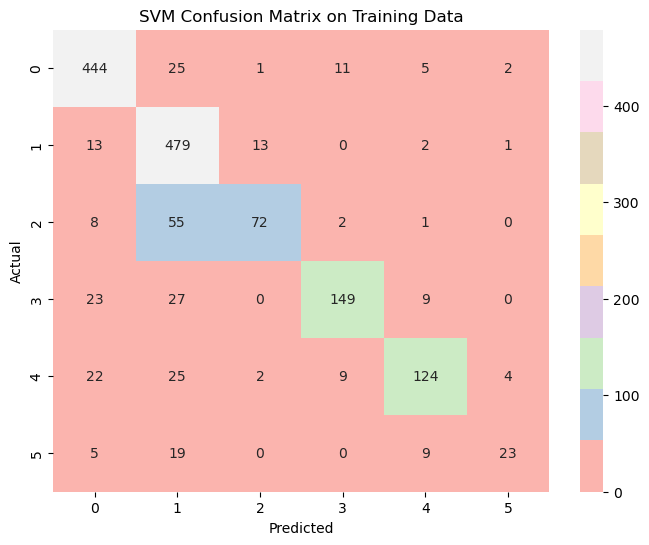

In [20]:
see_confusion_matrix(best_svm_model, "SVM Confusion Matrix on Training Data", y_val, X_val)

    confusion Matrix for testing data

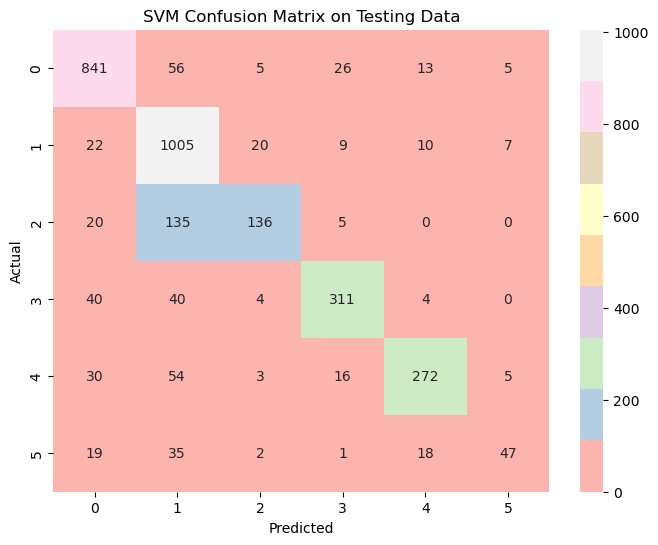

In [21]:
see_confusion_matrix(best_svm_model, "SVM Confusion Matrix on Testing Data", y_test, X_test)

    confusion Matrix for validation data

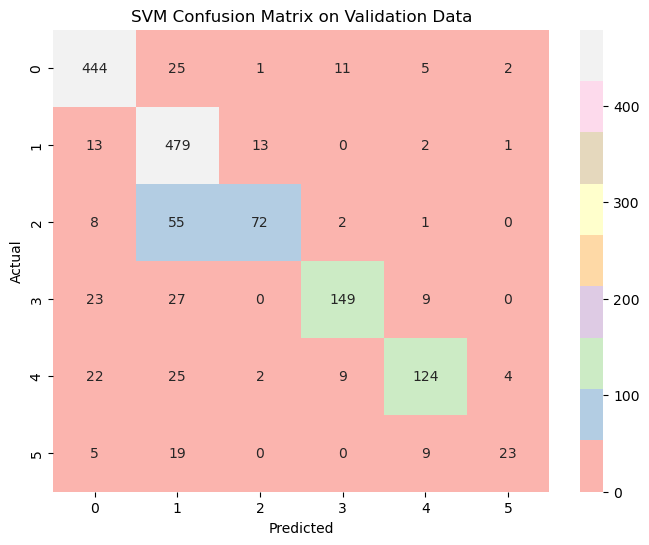

In [22]:
see_confusion_matrix(best_svm_model, "SVM Confusion Matrix on Validation Data", y_val, X_val)

    Training Accuracy: High training accuracy (99.78%) indicates that the model performs well on the training set.
    Test Accuracy: test accuracy (81.21%) compared to the training accuracy.
    Validation Accuracy: Similar validation accuracy (81.50%) to test accuracy.
    By building SVM Model

   # Conclusion
   - let's summarize the performance of the four models based on the provided accuracy metrics:

1. **Multinomial Naive Bayes (Model1)**:
   - Training Set Accuracy: 91.19%
   - Test Set Accuracy: 73.07%
   - Validation Set Accuracy: 74.43%
   - Model: MultinomialNB(alpha=0.1)
   
2. **Random Forest (Model2)**:
   - Training Set Accuracy: 99.79%
   - Test Set Accuracy: 84.48%
   - Validation Set Accuracy: 84.47%
   - Model: RandomForestClassifier()

3. **Logistic Regression (Model3)**:
   - Training Set Accuracy: 88.79%
   - Test Set Accuracy: 86.35%
   - Validation Set Accuracy: 86.30%
   - Model: LogisticRegression(penalty='l1', solver='liblinear')

4. **Support Vector Machine (Model4)**:
   - Training Set Accuracy: 99.79%
   - Test Set Accuracy: 81.22%
   - Validation Set Accuracy: 81.50%
   - Model: SVC(C=10)

**Conclusion**:

- The Random Forest model (Model2) achieves the highest accuracy on both the test and validation sets, indicating strong predictive performance.
- Logistic Regression (Model3) also performs well, with slightly lower accuracy than the Random Forest but still outperforming the other models.
- Multinomial Naive Bayes (Model1) shows decent performance but has lower accuracy compared to Random Forest and Logistic Regression models.
- Support Vector Machine (Model4) exhibits the lowest accuracy among the four models, especially on the test set.

Overall, based on the provided accuracy metrics, the Random Forest model appears to be the most suitable for this classification task, followed closely by Logistic Regression.